In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

from LPM import LPM
from simple_planner import Simple_Planner
import utils
import params

In [2]:
# Initialize planner
p_0 = np.array([[-5], [0]])
planner = Simple_Planner('quadrotor_linear_planning_model.mat', p_0)

In [3]:
# Set planner goal and obstacles
planner.p_goal = np.array([[5], [0]])
# (center, radius) tuples
planner.obstacles = [(np.array([3, 1]), 1.5),
                     (np.array([0, -1.5]), 1.5),
                     (np.array([-3, 1]), 1.5)]

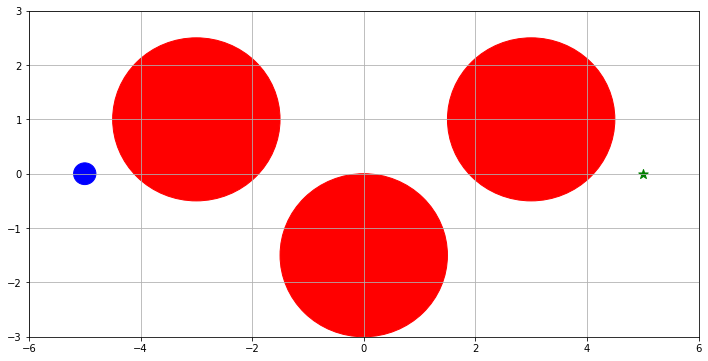

In [4]:
# Visualize setup
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim((-6, 6))
ax.set_ylim((-3, 3))
ax.grid()

#ax.scatter(p_0[0], p_0[1], s=50, marker='^', color='b')
ax.add_patch(plt.Circle(tuple(p_0), params.R_BOT, color='b'))
ax.scatter(planner.p_goal[0], planner.p_goal[1], s=100, marker='*', color='g')

plt_obs = []
for obs in planner.obstacles:
    ax.add_patch(plt.Circle(tuple(obs[0]), obs[1], color='r'))

plt.show()

In [5]:
# "Controller" loop frequency 
# Determined by trajectory discretization
# Currently the controller just pops off setpoints from the planner trajectories to save for plotting
controller_hz = 10  # 0.1 s

# Planner loop frequency
# Determines time between replans
planner_hz = 2  # 0.5 s

t_sim = 0  # counter for simulation time
trajectory = None
traj_idx = 0
done = False

# Initialize state
p = p_0
v = np.zeros((2,1))
a = np.zeros((2,1))
# State history
P = []
planning_times = []

while not done:

    # Planner
    if t_sim % int(controller_hz/planner_hz) == 0:
        # Replan
        print("Replanning: t_sim = ", t_sim)
        start_t = time.time()
        trajectory = planner.replan((p,v,a))
        planning_times.append(time.time() - start_t)
        traj_idx = 0

    # Controller
    # Pop off next setpoint
    p = trajectory[0][:,traj_idx][:,None]
    v = trajectory[1][:,traj_idx][:,None]
    a = trajectory[2][:,traj_idx][:,None]
    P.append(p)
    traj_idx += 1

    if np.linalg.norm(p - planner.p_goal) < params.R_GOAL_REACHED:
        print("Goal reached")
        done = True

    t_sim += 1

P = np.hstack(P)
print("Average planning time: ", np.mean(planning_times), " seconds")

Replanning: t_sim =  0
Replanning: t_sim =  5
Replanning: t_sim =  10
Replanning: t_sim =  15
Replanning: t_sim =  20
Replanning: t_sim =  25
Replanning: t_sim =  30
Replanning: t_sim =  35
Replanning: t_sim =  40
Replanning: t_sim =  45
Replanning: t_sim =  50
Replanning: t_sim =  55
Replanning: t_sim =  60
Replanning: t_sim =  65
Replanning: t_sim =  70
Replanning: t_sim =  75
Replanning: t_sim =  80
Replanning: t_sim =  85
Replanning: t_sim =  90
Replanning: t_sim =  95
Replanning: t_sim =  100
Replanning: t_sim =  105
Replanning: t_sim =  110
Replanning: t_sim =  115
Goal reached
Average planning time:  0.018345693747202556  seconds


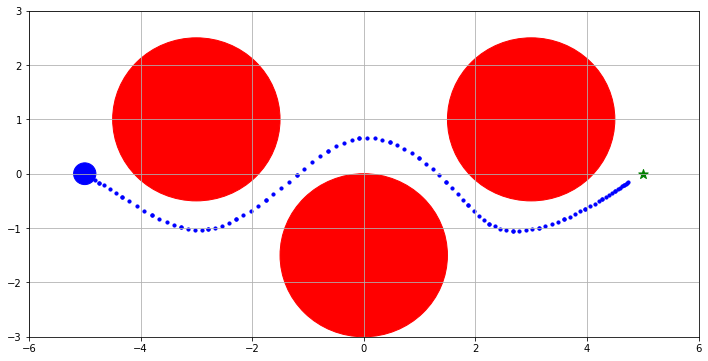

In [6]:
# Visualize setup
fig, ax = plt.subplots(figsize=(12,6))
ax.set_xlim((-6, 6))
ax.set_ylim((-3, 3))
ax.grid()

ax.add_patch(plt.Circle(tuple(p_0), params.R_BOT, color='b'))
ax.scatter(planner.p_goal[0], planner.p_goal[1], s=100, marker='*', color='g')

plt_obs = []
for obs in planner.obstacles:
    ax.add_patch(plt.Circle(tuple(obs[0]), obs[1], color='r'))

# Plot trajectory
ax.scatter(P[0,:], P[1,:], s=10, marker='o', color='b')

plt.show()